Generate a binary classification dataset with 1000 samples in 2D which is having 95% patterns from negative class and the rest 5% patterns from the positive class. Split the training and testing sets. Apply Logistic regression model and k-NN algorithm to classify the testing dataset and print their respective classification reports.
Apply an oversampling method to balance this imbalanced dataset. Again, Split the training and testing sets from the oversampled data. Apply Logistic regression model and k-NN algorithm (with same parameters) to classify the testing dataset and print the classification report. Make your conclusion on these two classification results

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter

In [19]:
X, y = make_classification(n_samples=1000, n_features=5, n_redundant=0,
	n_clusters_per_class=1, weights=[0.95], random_state=42)

Counter({np.int64(0): 946, np.int64(1): 54})


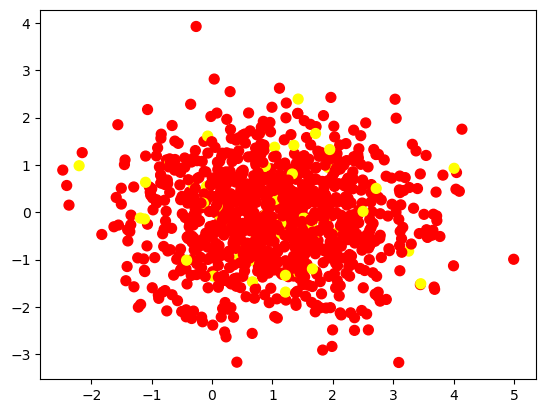

In [20]:
counter = Counter(y)
print(counter)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       190
           1       1.00      0.70      0.82        10

    accuracy                           0.98       200
   macro avg       0.99      0.85      0.91       200
weighted avg       0.99      0.98      0.98       200



#### KNN Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [25]:
print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       190
           1       1.00      0.60      0.75        10

    accuracy                           0.98       200
   macro avg       0.99      0.80      0.87       200
weighted avg       0.98      0.98      0.98       200



Counter({np.int64(0): 946, np.int64(1): 946})


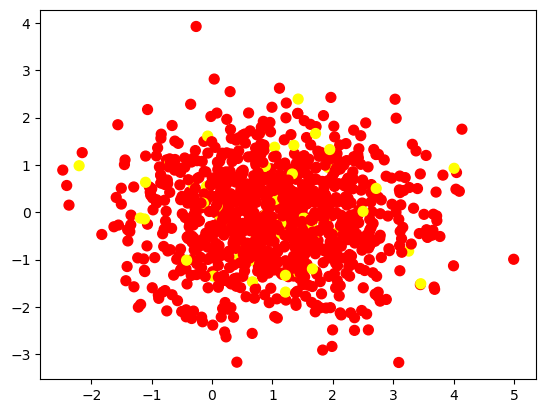

In [26]:
from imblearn.over_sampling import SMOTE
tl = SMOTE()
X_tl, y_tl = tl.fit_resample(X, y)
counter = Counter(y_tl)
print(counter)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

##### Logistic Regression

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       180
           1       0.97      0.94      0.95       199

    accuracy                           0.95       379
   macro avg       0.95      0.95      0.95       379
weighted avg       0.95      0.95      0.95       379



##### KNN Classification

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       180
           1       0.96      0.99      0.98       199

    accuracy                           0.97       379
   macro avg       0.98      0.97      0.97       379
weighted avg       0.97      0.97      0.97       379



#### Conclusion
After doing oversamplaning technique KNN worked more effecient (accuracy: 0.97) compared to Logistic Regression (accuracy: 0.95)